In [1]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
cab_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Cab_Data.pkl')
city_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\City.pkl')
customer_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Customer_ID.pkl')
transaction_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Transaction_ID.pkl')

In [3]:
city_data = city_data.astype({'City': 'category'})
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   City        20 non-null     category
 1   Population  20 non-null     object  
 2   Users       20 non-null     object  
dtypes: category(1), object(2)
memory usage: 1.2+ KB


In [4]:
cab_data = cab_data.astype({'Company': 'category', 'City': 'category'})
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Transaction_ID  359392 non-null  int64   
 1   Date_of_Travel  359392 non-null  object  
 2   Company         359392 non-null  category
 3   City            359392 non-null  category
 4   KM_Travelled    359392 non-null  float64 
 5   Price_Charged   359392 non-null  float64 
 6   Cost_of_Trip    359392 non-null  float64 
dtypes: category(2), float64(3), int64(1), object(1)
memory usage: 14.4+ MB


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [7]:
#changing Date_of_Travel from object type to date type
cab_data['Date_of_Travel'] = p.to_datetime(cab_data['Date_of_Travel'], format = '%m/%d/%Y')
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  category      
 3   City            359392 non-null  category      
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 MB


In [8]:
#separating months
months = []
for i in cab_data['Date_of_Travel']:
    months.append(i.month)
cab_data['Month'] = months

In [9]:
#separating years
years = []
for i in cab_data['Date_of_Travel']:
    years.append(i.year)
cab_data['Year'] = years

In [10]:
cab_data = cab_data.drop('Date_of_Travel', axis = 1)
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [11]:
cab_data.groupby(by='Company').groups.keys()

dict_keys(['Pink Cab', 'Yellow Cab'])

In [12]:
pink_cab = cab_data[cab_data['Company'] == 'Pink Cab']
pink_cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [13]:
yellow_cab = cab_data[cab_data['Company'] == 'Yellow Cab']
yellow_cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016


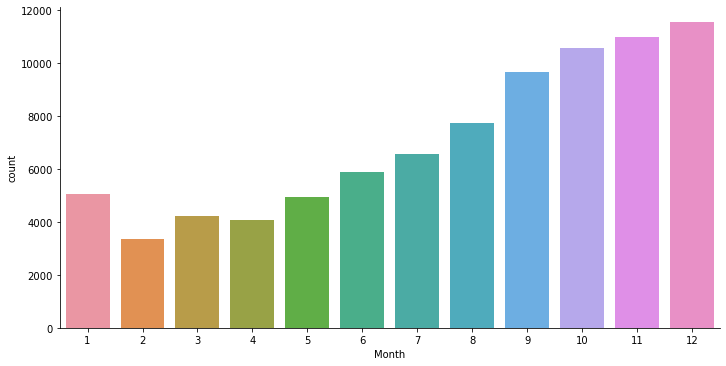

In [15]:
#monthly usage of cab companies (Pink Cab)
s.catplot(data = pink_cab, x = 'Month', kind = 'count', aspect = 2) 

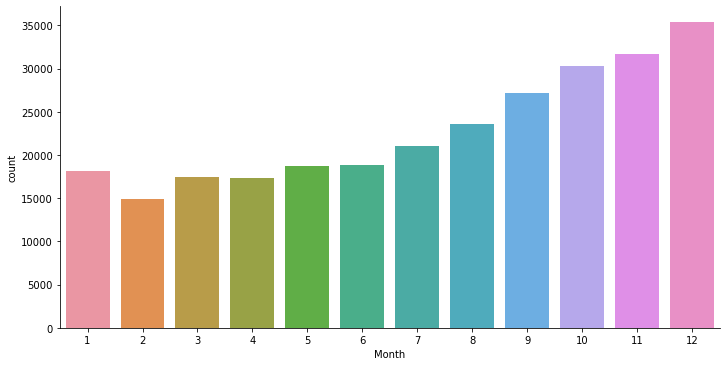

In [16]:
#monthly usage of cab companies (Yellow Cab)
s.catplot(data = yellow_cab, x = 'Month', kind = 'count', aspect = 2) 

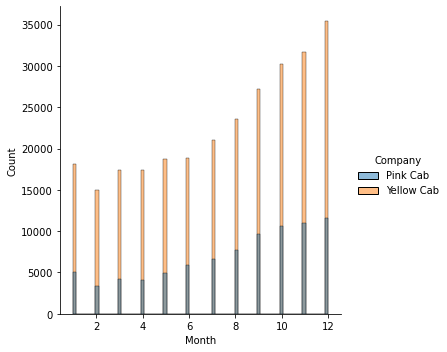

In [17]:
#monthly usage of cab companies at the same graph
s.displot(data = cab_data, x = 'Month', hue = 'Company')
#yellow cab has more customers

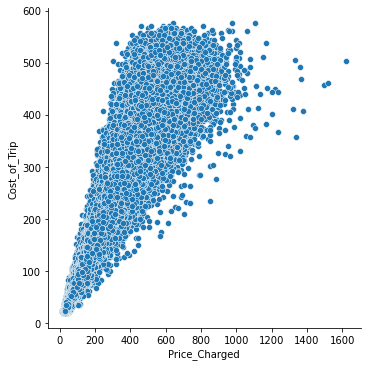

In [18]:
#distribution of Price_Charged vs Cost_of_Trip (Pink Cab)
s.relplot(data = pink_cab, x = 'Price_Charged', y = 'Cost_of_Trip')

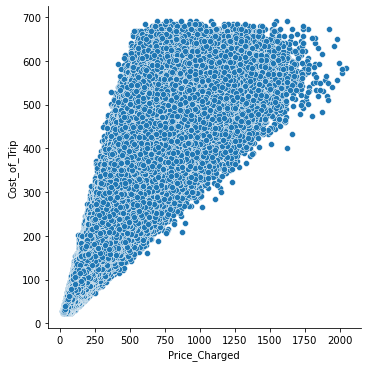

In [19]:
#distribution of Price_Charged vs Cost_of_Trip (Yellow Cab)
s.relplot(data = yellow_cab, x = 'Price_Charged', y = 'Cost_of_Trip')

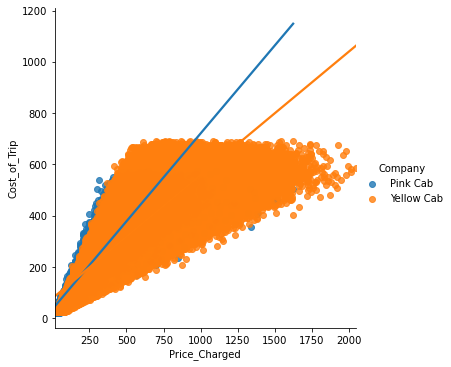

In [20]:
#distribution of Price_Charged vs Cost_of_Trip 
s.lmplot(x = 'Price_Charged', y = 'Cost_of_Trip', hue = 'Company', data = cab_data)
#yellow cab earns more

In [21]:
#sum of profits (Pink Cab)
pink_cab_profit = pink_cab['Price_Charged'] - pink_cab['Cost_of_Trip']
pink_cab_profit.sum()

5307328.321

In [22]:
#profit per ride (Pink Cab)
pink_cab_profit_per_ride = pink_cab_profit.sum() / pink_cab_profit.count()
pink_cab_profit_per_ride

62.65217410961977

In [23]:
#sum of profits (Yellow Cab)
yellow_cab_profit = yellow_cab['Price_Charged'] - yellow_cab['Cost_of_Trip']
yellow_cab_profit.sum()

44020373.17080001

In [24]:
#profit per ride (Yellow Cab)
yellow_cab_profit_per_ride = yellow_cab_profit.sum() / yellow_cab_profit.count()
yellow_cab_profit_per_ride

160.25998584103016

In [27]:
customer_merge = p.merge(transaction_data, customer_data, how = 'outer', on = 'Customer_ID')

In [28]:
customer_merge.isna().sum()

Transaction_ID        0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [29]:
customer_merge

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [30]:
transaction_merge = p.merge(cab_data, customer_merge, how = 'inner', on = 'Transaction_ID')

In [31]:
transaction_merge.isna().sum()

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Month                 0
Year                  0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [32]:
master_data = p.merge(transaction_merge, city_data, how = 'inner', on = 'City')

Text(0.5, 1.0, 'Usage of cab companies')

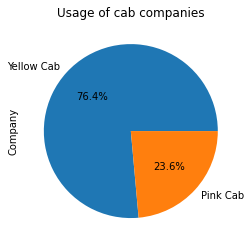

In [33]:
master_data.isna().sum()
master_data_count = master_data['Company'].value_counts()
master_data_count.plot(kind='pie', autopct='%1.1f%%').set_title("Usage of cab companies")
#usage of yellow cab is higher than pink cab

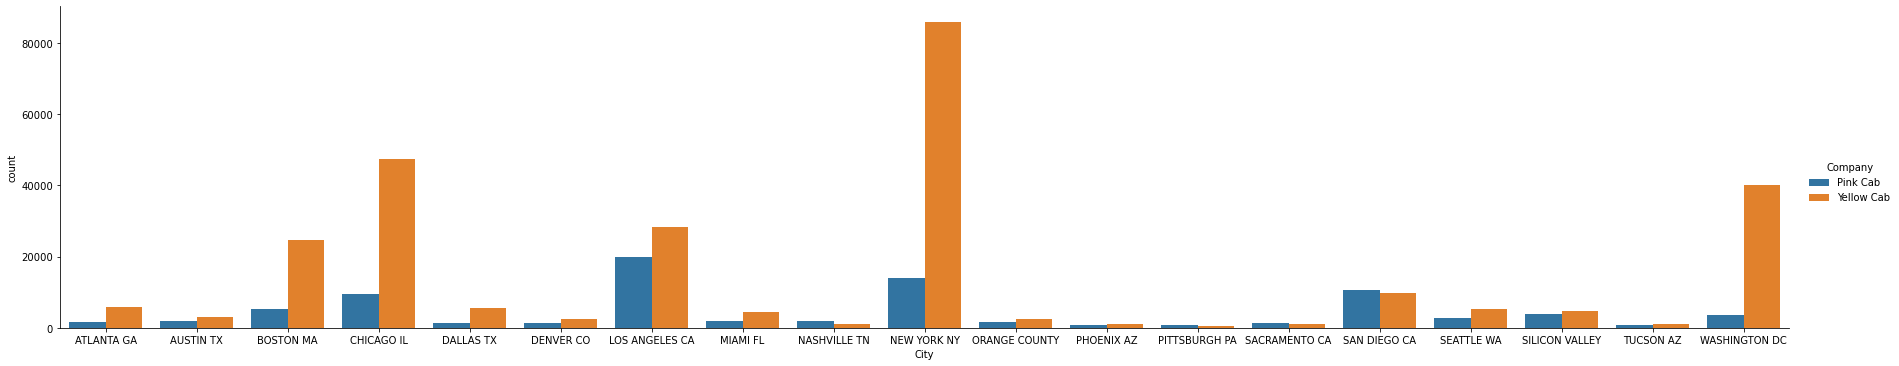

In [35]:
#usage of cab companies per cities
s.catplot(data=master_data, x='City', kind='count', hue='Company', aspect=5)

In [36]:
master_data['Profit'] = master_data['Price_Charged']-master_data['Cost_of_Trip']

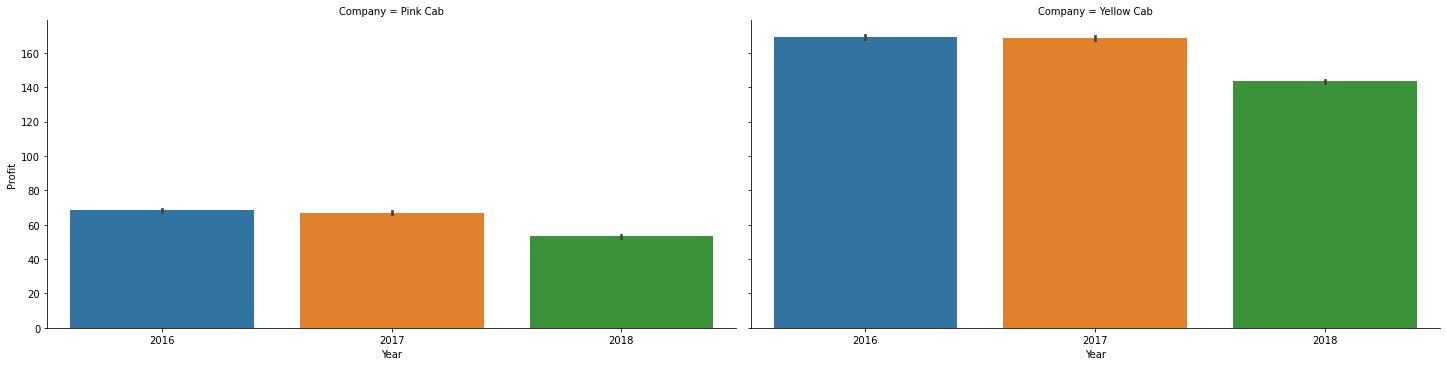

In [38]:
#profits per year
s.catplot(data= master_data, x='Year', y = 'Profit', col='Company', kind = 'bar', aspect=2)

In [39]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction_ID      359392 non-null  int64   
 1   Company             359392 non-null  category
 2   City                359392 non-null  object  
 3   KM_Travelled        359392 non-null  float64 
 4   Price_Charged       359392 non-null  float64 
 5   Cost_of_Trip        359392 non-null  float64 
 6   Month               359392 non-null  int64   
 7   Year                359392 non-null  int64   
 8   Customer_ID         359392 non-null  int64   
 9   Payment_Mode        359392 non-null  object  
 10  Gender              359392 non-null  object  
 11  Age                 359392 non-null  int64   
 12  Income (USD/Month)  359392 non-null  int64   
 13  Population          359392 non-null  object  
 14  Users               359392 non-null  object  
 15  Profit           

In [40]:
master_data = master_data.astype({'Payment_Mode':'category', 'Gender':'category'})

In [41]:
master_data.dtypes

Transaction_ID           int64
Company               category
City                    object
KM_Travelled           float64
Price_Charged          float64
Cost_of_Trip           float64
Month                    int64
Year                     int64
Customer_ID              int64
Payment_Mode          category
Gender                category
Age                      int64
Income (USD/Month)       int64
Population              object
Users                   object
Profit                 float64
dtype: object

In [42]:
Population = []
for i in master_data['Population']:
    Population.append(i.replace(',',''))
master_data['Population'] = Population

In [43]:
Users = []
for i in master_data['Users']:
    Users.append(i.replace(',',''))
master_data['Users'] = Users

In [44]:
master_data = master_data.astype({'Population':'int64', 'Users':'int64'})

In [45]:
master_data.dtypes

Transaction_ID           int64
Company               category
City                    object
KM_Travelled           float64
Price_Charged          float64
Cost_of_Trip           float64
Month                    int64
Year                     int64
Customer_ID              int64
Payment_Mode          category
Gender                category
Age                      int64
Income (USD/Month)       int64
Population               int64
Users                    int64
Profit                 float64
dtype: object

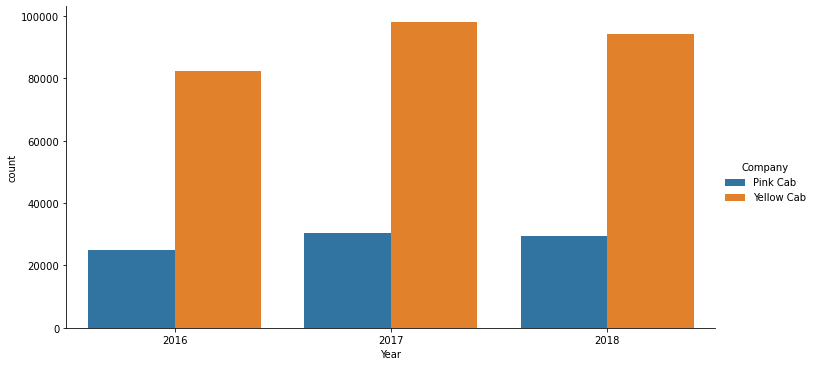

In [46]:
#usage of cab companies per year
s.catplot(data = master_data, x='Year', kind='count', hue='Company', aspect=2)

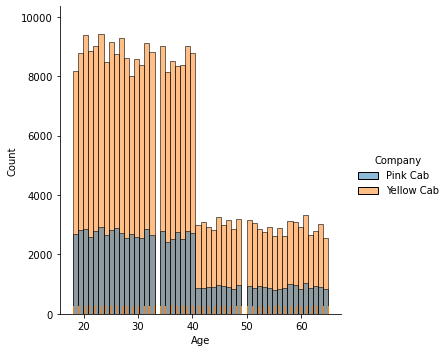

In [47]:
#usage of cab companies by age
s.displot(data = master_data, x = 'Age', hue = 'Company', bins=50, rug=True)

In [48]:
pink_cab_age = p.merge(pink_cab, customer_merge, how = 'inner', on = 'Transaction_ID')

In [49]:
pink_cab_age.isnull().sum()

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Month                 0
Year                  0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [50]:
yellow_cab_age = p.merge(yellow_cab, customer_merge, how = 'inner', on = 'Transaction_ID')

In [51]:
yellow_cab_age.isnull().sum()

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Month                 0
Year                  0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [52]:
pink_cab[{'Price_Charged', 'Cost_of_Trip', 'KM_Travelled'}].describe().T

,count,mean,std,min,25%,50%,75%,max
Cost_of_Trip,84711.0,248.148682,135.403345,19.0,131.868,246.33,360.180,576.00
Price_Charged,84711.0,310.800856,181.995661,15.6,159.970,298.06,441.505,1623.48
KM_Travelled,84711.0,22.559917,12.231092,1.9,12.000,22.44,32.960,48.00


In [53]:
yellow_cab[{'Price_Charged', 'Cost_of_Trip', 'KM_Travelled'}].describe().T

,count,mean,std,min,25%,50%,75%,max
Cost_of_Trip,274681.0,297.922004,162.548986,22.80,158.40,295.596,432.432,691.20
Price_Charged,274681.0,458.181990,288.386166,20.73,226.68,425.060,633.880,2048.03
KM_Travelled,274681.0,22.569517,12.234298,1.90,11.99,22.440,32.960,48.00


In [54]:
master_data[{'Price_Charged', 'Cost_of_Trip', 'KM_Travelled'}].describe().T

,count,mean,std,min,25%,50%,75%,max
Cost_of_Trip,359392.0,286.190113,157.993661,19.0,151.2000,282.48,413.6832,691.20
Price_Charged,359392.0,423.443311,274.378911,15.6,206.4375,386.36,583.6600,2048.03
KM_Travelled,359392.0,22.567254,12.233526,1.9,12.0000,22.44,32.9600,48.00


In [55]:
gender_analysis = master_data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_analysis

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

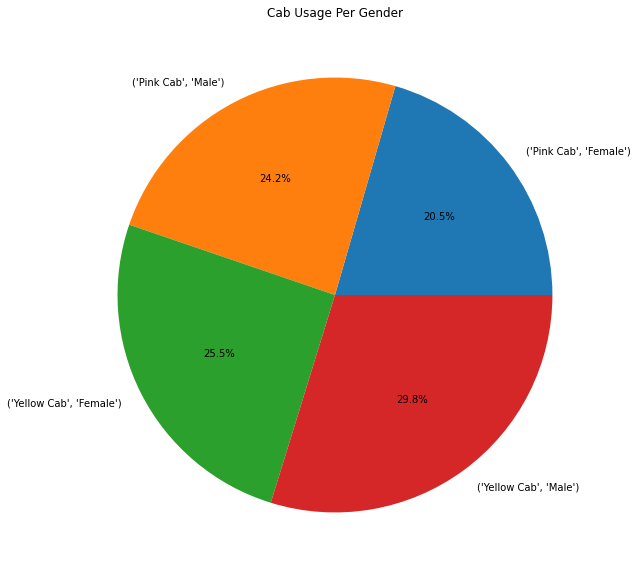

In [56]:
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(gender_analysis.values , labels=gender_analysis.index, autopct='%1.1f%%')
plt.title('Cab Usage Per Gender')
plt.show()

In [57]:
master_data = master_data.rename(columns={'Income (USD/Month)':'Income'})
master_data.groupby(['Company', 'Gender']).agg({'Age': 'mean', 'Payment_Mode': 'nunique', 'Income': 'mean'})

Age  Payment_Mode        Income
Company    Gender                                       
Pink Cab   Female  35.270518             2  15074.779696
           Male    35.363596             2  15046.562618
Yellow Cab Female  35.293129             2  15052.537345
           Male    35.376189             2  15040.649473

In [172]:
master_data.groupby(['Company', 'Gender','Payment_Mode']).agg({'Age': 'mean', 'Income': 'mean'})

Age        Income
Company    Gender Payment_Mode                         
Pink Cab   Female Card          35.311169  15070.483064
                  Cash          35.209879  15081.188938
           Male   Card          35.408755  15072.911708
                  Cash          35.296201  15007.239208
Yellow Cab Female Card          35.251196  15070.910917
                  Cash          35.355999  15024.989852
           Male   Card          35.409862  15033.178743
                  Cash          35.325693  15051.852449

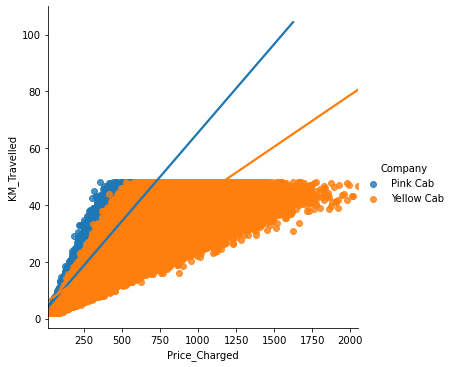

In [58]:
#distribution of Price_Charged vs KM_Travelled
s.lmplot(x = 'Price_Charged', y = 'KM_Travelled', hue = 'Company', data = cab_data)